Neste projeto iremos analisar o conjunto de dados sobre preços de carros com o **objetivo de prever se o carro será vendido ou não**, baseado nos dados de carros que foram vendidos.

Em seguida, iremos avaliar a performance do nosso modelo utilizando metodologias de treino e teste Hold Out e Validação Cruzada.

In [2]:
import pandas as pd

df = pd.read_csv('Dados/precos.csv')
df.head()

,milhas_por_ano,ano_do_modelo,preco,vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   milhas_por_ano  10000 non-null  int64  
 1   ano_do_modelo   10000 non-null  int64  
 2   preco           10000 non-null  float64
 3   vendido         10000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 312.6 KB


Seria mais interessante trabalharmos com quilometros, então vamos adicionar uma nova coluna "km_por_ano", convertendo o valor de milhas para km.

In [4]:
COEFFICIENT = 1.609344 # Conversão de milhas para ano
df['km_por_ano'] = df['milhas_por_ano'].apply(lambda x: x * COEFFICIENT)
df.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano
0,21801,2000,30941.02,1,35085.308544
1,7843,1998,40557.96,1,12622.084992
2,7109,2006,89627.50,0,11440.826496
3,26823,2015,95276.14,0,43167.434112
4,7935,2014,117384.68,1,12770.144640


Vamos agora criar outra coluna baseada no "ano_do_modelo".

In [5]:
from datetime import datetime

year = datetime.today().year
df['idade_carro'] = df['ano_do_modelo'].apply(lambda x: year - x)
df.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano,idade_carro
0,21801,2000,30941.02,1,35085.308544,24
1,7843,1998,40557.96,1,12622.084992,26
2,7109,2006,89627.50,0,11440.826496,18
3,26823,2015,95276.14,0,43167.434112,9
4,7935,2014,117384.68,1,12770.144640,10


Vamos remover as colunas que não iremos mais utilizar, no caso, "milhas_por_ano" e "ano_do_modelo".

In [6]:
df.drop(['milhas_por_ano', 'ano_do_modelo'], axis=1, inplace=True)
df

,preco,vendido,km_por_ano,idade_carro
0,30941.02,1,35085.308544,24
1,40557.96,1,12622.084992,26
2,89627.50,0,11440.826496,18
3,95276.14,0,43167.434112,9
4,117384.68,1,12770.144640,10
...,...,...,...,...
9995,97112.86,0,25060.704768,18
9996,107424.63,1,21317.370624,22
9997,93856.99,0,20950.440192,10
9998,51250.57,1,16840.175616,13


In [7]:
# Divisão dos dados e normalização (transformação na escala dos dados)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = df.drop('vendido', axis=1)
y = df['vendido']

SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

Antes de iniciarmos todo o processo de treinamento do nosso modelo é importante definirmos o nosso **Modelo Baseline**.

O Baseline serve como um **ponto de partida** que pode ser usado para comparar o desempenho do nosso modelo.

Isso ajuda a entender o quão melhor um modelo mais sofisticado está performando em comparação a uma abordagem mais simples e direta (Dummy).

Em outras palavras, se formos treinar nosso modelo com outros tipos de algoritmo, é necessário que a métrica seja maior que o do nosso DummyClassifier, do contrário, não valerá a pena seguir com o treinamento do modelo com um algoritmo que demonstrou performance pior comparado ao nosso Baseline.

Uma forma bem simples de um Modelo Baseline seria, por exemplo, no caso do nosso dataset atual (preços.csv), onde poderiamos fazer um cálculo entre o *número de carros que foram comprados* / *número total de carros* (58%).

O valor resultante seria o valor mínimo de acurácia, o ponto de partida para que possamos melhorar nosso modelo.

In [8]:
# Treinamento do modelo com Dummy Classifier (é um modelo com estratégias "ingênuas")
# Leva em consideração, por exemplo, dados mais frequentes, etc
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.dummy import DummyClassifier

# O parametro strategy define qual será o método de classificação do dommy
# Por exemplo, "chuta" o valor mais frequente (valor mais comum) ou "chuta" o valor proporcional ao quão comum ela é
dummy = DummyClassifier() 

# Com o DummyClassifier, treinamos o modelo com os dados padrões, sem a necessidade de normaliza-los/padroniza-los
dummy.fit(X_train, y_train)

model_predict = dummy.predict(X_test)

accuracy = accuracy_score(y_test, model_predict)
print(f'Acurácia: {accuracy*100:.2f}%')


len(df.query('vendido == 1')) / len(df)

Acurácia: 57.92%


0.58

In [9]:
# Treinamento do modelo com SVC
from sklearn.svm import SVC

model = SVC()

model.fit(X_train_scaled, y_train)

model_predict = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, model_predict)
print(f'Acurácia: {accuracy*100:.2f}%')

recall = recall_score(y_test, model_predict)
print(f'Recall: {recall*100:.2f}%')

precision = precision_score(y_test, model_predict)
print(f'Precisão: {precision*100:.2f}%')

f1_score_ = f1_score(y_test, model_predict)
print(f'F1 Score: {f1_score_*100:.2f}%')

Acurácia: 75.88%
Recall: 76.93%
Precisão: 80.55%
F1 Score: 78.70%


Para essa situação, iremos utilizar um algoritmo de treinamento diferente: a **Árvore de Decisão**.

Aqui podemos usar os dados brutos sem normalização, pois dados fora de escala não afetam a árvore de decisão.

Iremos utilizar este modelo pois, este especificamente explica por que esta sendo tomado determinada decisão.

Este tipo de algoritmo toma decisões em cascata, ou seja, em sequência, como um "*if else*".

In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# O parametro max_depth (maximo de profundidade) limita a quantidade de níveis de profundidade da nossa árvore
# Pois se o tamanho de árvores for muito grande é possível que aconteça o Overfitting 
# Overfitting (sobreajuste): quando o modelo basicamente "decora" os nossos dados de treino e não generaliza bem para novos dados.
dt_model = DecisionTreeClassifier(max_depth=3)

dt_model.fit(X_train, y_train)

dt_model_predict = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, dt_model_predict)
print(f'Acurácia: {accuracy*100:.2f}%')

Acurácia: 77.60%


Vamos visualizar a nossa árvore de decisão com a função *plot_tree* da própria biblioteca sklearn.

Aqui podemos ver como o nosso algoritmo irá prever os dados. No gráfico abaixo, é possível visualizar os motivos de cada decisão do modelo, ou seja, o modelo "explica" (descreve) o motivo de suas previsões.

[Text(0.4230769230769231, 0.875, 'preco <= 59982.246\ngini = 0.487\nsamples = 7500\nvalue = [3148, 4352]\nclass = sim'),
 Text(0.15384615384615385, 0.625, 'preco <= 40083.385\ngini = 0.194\nsamples = 3273\nvalue = [356, 2917]\nclass = sim'),
 Text(0.28846153846153844, 0.75, 'True  '),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 1441\nvalue = [0, 1441]\nclass = sim'),
 Text(0.23076923076923078, 0.375, 'preco <= 41554.541\ngini = 0.313\nsamples = 1832\nvalue = [356, 1476]\nclass = sim'),
 Text(0.15384615384615385, 0.125, 'gini = 0.418\nsamples = 121\nvalue = [36, 85]\nclass = sim'),
 Text(0.3076923076923077, 0.125, 'gini = 0.304\nsamples = 1711\nvalue = [320, 1391]\nclass = sim'),
 Text(0.6923076923076923, 0.625, 'km_por_ano <= 24124.066\ngini = 0.448\nsamples = 4227\nvalue = [2792, 1435]\nclass = não'),
 Text(0.5576923076923077, 0.75, '  False'),
 Text(0.5384615384615384, 0.375, 'preco <= 99974.41\ngini = 0.497\nsamples = 2629\nvalue = [1417, 1212]\nclass = não'),
 Text(0.4

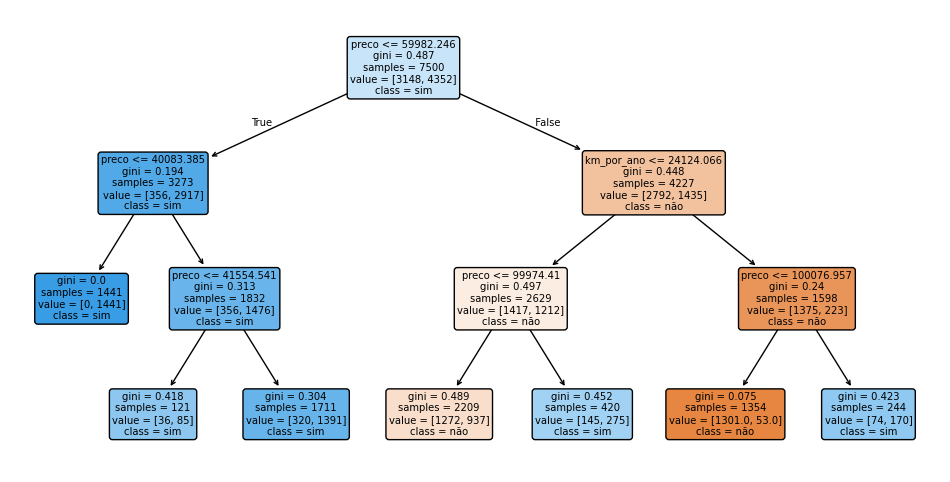

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plot_tree(dt_model,
          filled=True,
          rounded=True,
          feature_names=X.columns, # Ao invés dos índices das colunas, aparecerá os nomes de cada coluna
          class_names=['não', 'sim']) # Ao invés de true e false, aparecerá sim e não

### Validação cruzada

Até o momento utilizamos a metodologia **Hold Out** para realizar o treino e teste do nosso modelo. O que isto significa?

**Hold Out**
- É o ato de dividir os dados de treino e testes apenas uma vez, baseado em um número de seed (no caso, o **random_state** do método *train_test_split*).
- Porém utilizando este método, podemos estar suscetível à aleatoriedade, pois caso pegarmos diferentes sessões dos dados para treino e teste, as métricas de performance do nosso modelo podem ser diferentes, tanto pra melhor ou pior.
- Este não é um cenário ideal, e para resolver isto, podemos utilizar a metodolodia da **Validação Cruzada**.

**K-fold (Validação Cruzada)**
- Trata-se de dividir os dados em **k** partes para fazer a validação cruzada, onde ao final, será tirado a média das métricas (por exemplo, acurácia) para validar a performance do modelo.
- Esta metodologia irá treinar e testar nosso modelo de forma consecutiva, treinando e testando os dados com diferentes partes dos dados.
- Ao final, irá trazer um *score*, especificamente o *test_score*, onde a partir dele teremos uma média dos acertos e podemos realizar o desvio padrão para adquirirmos o quanto esses acertos podem variar.

**Qual a diferença?**
- Com o processo da validação cruzada, o procedimento de teste será feito de forma mais geral, e não apenas com uma única sessão dos dados (que é o caso do Hold Out, onde é separado 80% treino e 20% teste, por exemplo).
- Onde será possível ter uma métrica de mais real da previsão do nosso modelo, que pode variar de x% até y%.
- **No final, poderemos treinar o nosso modelo que será usado no mundo real com todos os dados da nossa base.**

Documentação do Scikit-Learn sobre validação cruzada:
- https://scikit-learn.org/1.5/modules/cross_validation.html

In [12]:
def imprime_resultados(results):
    media = results['test_score'].mean()
    desvio_padrao = results['test_score'].std()

    print(f'Acurácia com validação cruzada: {(media - 2 * desvio_padrao)*100:.2f}% // {(media + 2 * desvio_padrao)*100:.2f}%')

In [13]:
from sklearn.model_selection import cross_validate

dt_model = DecisionTreeClassifier(max_depth=2)

# Validação cruzada
results = cross_validate(dt_model, X, y, cv=3)
results['test_score']
imprime_resultados(results)

Acurácia com validação cruzada: 74.99% // 76.57%


Para adquirir o intervalo de acurácia que nosso modelo pode atingir, usamos uma combinação de *média* e *desvio padrão*.

Porém ainda estamos suscetível à um número: o número de divisões (parametro **cv**) que será feita nos nossos dados, no caso 3.

O recomendado é que esse número seja 5 ou 10. Isto é baseado na própria documentação do scikit-learn, onde citam Papers científicos que indicam que uma escolhe de 5 ou 10 já é o suficiente.

Então faremos novamente o nosso script anterior, porém agora com o número 5.

**OBS. Por padrão, a partir da versão 0.22 do SKLearn, passou-se a adotar 5 como padrão do parametro cv, em vez de 3.**

In [14]:
dt_model = DecisionTreeClassifier(max_depth=2)

# Validação cruzada
results = cross_validate(dt_model, X, y, cv=5)
results['test_score']
imprime_resultados(results)

Acurácia com validação cruzada: 75.21% // 76.35%


### KFold com aleatorização

Além de quebrar em k pedaços, é possível embaralhar os dados com o parametro *Shuffle*.

In [15]:
from sklearn.model_selection import KFold
import numpy as np

SEED = 301

kfold = KFold(n_splits=10, shuffle=True, random_state=SEED)
dt_model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(dt_model, X, y, cv=kfold)
imprime_resultados(results)

Acurácia com validação cruzada: 73.26% // 78.26%


**Simulando uma situação de azar**

Simulando uma situação onde os dados estão desbalanceados e não temos como balancea-los com a *estratificação*, por exemplo, com o parametro stratify=y.

Pode ser "azar", assim  como pode ser também uma proporção de exemplos desbalanceados entre as classes.

In [16]:
# Simulando uma situação de azar sem o "Shuffle" (Embaralhamento)
dados_azar = df.sort_values('vendido', ascending=True) # Ordena os elementos com a variavel atributo
X_azar = dados_azar.drop('vendido', axis=1)
y_azar = dados_azar['vendido']

kfold = KFold(n_splits=10)
dt_model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(dt_model, X_azar, y_azar, cv=kfold)
imprime_resultados(results)

Acurácia com validação cruzada: 34.56% // 81.36%


In [17]:
# Agora com o "Shuffle"
kfold = KFold(n_splits=10, shuffle=True)
dt_model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(dt_model, X_azar, y_azar, cv=kfold)
imprime_resultados(results)

Acurácia com validação cruzada: 73.53% // 78.03%


### Estratificação com Validação Cruzada

Quando há um desbalanceamento entre as classes é necessário que seja realizado a estratificação dos dados, onde é realizado a distribuição proporcional das classes entre os dados de treino e teste.

Para isto, podemos utilizar o **KFold com Estratificação** da bilioteca *sklearn*.

In [18]:
# Basta apenas importar o StratifiedKFold da biblioteca sklearn
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle=True)
dt_model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(dt_model, X_azar, y_azar, cv=kfold)
imprime_resultados(results)

Acurácia com validação cruzada: 73.68% // 77.88%


### Validação cruzada usando grupos

Primeiramente iremos criar uma nova coluna no dataset chamado "modelo do carro", onde iremos posteriormente agrupar os dados por modelo para realizar o treinamento.

**O objetivo disto é:**
- Em caso de no futuro surgir um novo modelo de carro, o nosso classificador deve conseguir prever também para este novo modelo.
- Em outras palavras, o **modelo de ML deve ser capaz de prever para novos carros** (novos dados) e **não apenas memorizar os modelos de carros existentes** na base de dados.

In [19]:
np.random.seed(SEED)

# Iremos gerar alguns dados aleatórios para o "modelo do carro"
# De acordo com a idade do carro, ira somar ou subtrair um número aleatório de -2 a 2
df['modelo_carro'] = df['idade_carro'] + np.random.randint(-2, 3, len(df))

df.head()

# Disponibilizar a nova planilha em csv
df.to_csv('preco_carros_modificado.csv', index=False)

In [20]:
# Modelos de carro unicos
df['modelo_carro'].unique()

array([22, 28, 18, 10,  9, 17, 24, 23, 19,  6, 21, 16, 15, 20,  7, 11, 25,
       27, 14, 13, 26, 12,  8,  5])

**Testando validação cruzada com GroupKFold**

No caso que estamos trabalhando, de modo geral, os carros se comportam indiferentemente do modelo. Então, nossa classificação foi próxima, levando em consideração ou não o modelo do carro. Quando é dito "levando em consideração" não é para estimar, mas sim para treinar e testar. Reparem que x o x_azar, entre outros, continuam sem usar a coluna modelo. Para classificar só usamos preco, idade_do_modelo e km por ano.

In [21]:
from sklearn.model_selection import GroupKFold

kfold = GroupKFold(n_splits=10)
dt_model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(dt_model, X_azar, y_azar, cv=kfold, groups=df['modelo_carro'])
imprime_resultados(results)

Acurácia com validação cruzada: 74.03% // 77.56%


### Validação Cruzada com padronização (StandardScaler) e **Pipeline**

O passo a passo que acontecerá a seguir realiza tanto a transformação dos dados numéricos (padronização), assim como o treinamento do modelo com a validação cruzada.

Isto é possível ser realizado de forma ágil utilizando um **Pipeline**, para evitar a repetição de código.

**OBS.** Para rodar algorítimos com *cross_validate*, que exigem pré processamento, talvez seja necessário realizar o treino (fit) desse pré processamento somente na parte de treino. Para isso será necessário incluí-lo em um Pipeline. Portanto, se tivermos 10 fases de treino, teremos que rodar o *scaler* para cada uma do conjunto de treino, e é isso que o Pipeline faz para nós.

In [22]:
from sklearn.pipeline import Pipeline

np.random.seed(SEED)

scaler = StandardScaler()
model_svc = SVC()

pipeline = Pipeline(steps=[
    ('preprocessamento', scaler),
    ('estimador', model_svc)
])

kfold = GroupKFold(n_splits=10)
results = cross_validate(pipeline, X_azar, y_azar, cv=kfold, groups=df['modelo_carro'])
imprime_resultados(results)

Acurácia com validação cruzada: 74.02% // 79.22%


### Porém, o que fazer com a validação cruzada?

A média e o intervalo providos pela validação cruzada diz o quão bem você espera que o modelo se comporte com os dados previamente mas... se você usou o cross validation com 10 folds, qual dos 10 modelos treinados você vai usar agora no mundo real?

A ideia da validação cruzada num conjunto de dados **somente te diz o que você pode esperar**. Este processo **não treina o seu modelo final**.

Agora que temos o algoritmo do estimador (por exemplo, um DecisionTreeClassifier) e pretende usá-lo no mundo real:

In [23]:
model_dt = DecisionTreeClassifier(max_depth=2)

Porém agora podemos utilizar **todos os dados** que temos para realizar o **treinamento do nosso modelo** que usaremos no mundo real, pois a **etapa de teste foi realizada na validação cruzada** (cross validation).

In [24]:
model_dt.fit(X, y)

DecisionTreeClassifier(max_depth=2)